In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename));

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/100-bird-species/test/PINK ROBIN/4.jpg
/kaggle/input/100-bird-species/test/PINK ROBIN/5.jpg
/kaggle/input/100-bird-species/test/PINK ROBIN/1.jpg
/kaggle/input/100-bird-species/test/PINK ROBIN/3.jpg
/kaggle/input/100-bird-species/test/PINK ROBIN/2.jpg
/kaggle/input/100-bird-species/test/BLACK SKIMMER/4.jpg
/kaggle/input/100-bird-species/test/BLACK SKIMMER/5.jpg
/kaggle/input/100-bird-species/test/BLACK SKIMMER/1.jpg
/kaggle/input/100-bird-species/test/BLACK SKIMMER/3.jpg
/kaggle/input/100-bird-species/test/BLACK SKIMMER/2.jpg
/kaggle/input/100-bird-species/test/ELEGANT TROGON/4.jpg
/kaggle/input/100-bird-species/test/ELEGANT TROGON/5.jpg
/kaggle/input/100-bird-species/test/ELEGANT TROGON/1.jpg
/kaggle/input/100-bird-species/test/ELEGANT TROGON/3.jpg
/kaggle/input/100-bird-species/test/ELEGANT TROGON/2.jpg
/kaggle/input/100-bird-species/test/PEREGRINE FALCON/4.jpg
/kaggle/input/100-bird-species/test/PEREGRINE FALCON/5.jpg
/kaggle/input/100-bird-species/test/PEREGRINE FALCON

In [2]:
from keras.preprocessing.image import ImageDataGenerator
train_batch = 32

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('/kaggle/input/100-bird-species/train',
                                                 target_size = (224, 224),
                                                 batch_size = train_batch,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory('/kaggle/input/100-bird-species/test',
                                            target_size = (224,224),
                                            batch_size = train_batch,
                                            class_mode = 'categorical')
validation_generator = train_datagen.flow_from_directory('/kaggle/input/100-bird-species/valid',target_size=(224, 224),class_mode='categorical')



Using TensorFlow backend.


Found 27503 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.
Found 1000 images belonging to 200 classes.


In [3]:
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense,Dropout
from keras.models import Sequential


In [4]:
from keras import applications

In [5]:
import tensorflow as tf
from keras.models import Model

In [6]:
base_model = applications.ResNet50V2(weights='imagenet', include_top=False, input_shape= (224,224,3))
add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(512, activation='relu'))
add_model.add(Dense(200, activation='softmax'))
model = Model(inputs=base_model.input, outputs=add_model(base_model.output))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    



94674944/94668760 [==============================] - 7s 0us/step


In [7]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

In [8]:
epoch = 10
train_steps_per_epoch = 1000
history= model.fit_generator( training_set, steps_per_epoch=train_steps_per_epoch, epochs=epoch, validation_data=validation_generator) 

Epoch 1/10
1000/1000 [==============================] - 619s 619ms/step - loss: 4.1183 - accuracy: 0.1374 - val_loss: 3.2803 - val_accuracy: 0.2800
Epoch 2/10
1000/1000 [==============================] - 540s 540ms/step - loss: 2.2633 - accuracy: 0.4505 - val_loss: 1.7115 - val_accuracy: 0.3960
Epoch 3/10
1000/1000 [==============================] - 563s 563ms/step - loss: 1.6062 - accuracy: 0.5904 - val_loss: 3.3759 - val_accuracy: 0.5160
Epoch 4/10
1000/1000 [==============================] - 590s 590ms/step - loss: 1.2830 - accuracy: 0.6658 - val_loss: 0.1857 - val_accuracy: 0.7000
Epoch 5/10
1000/1000 [==============================] - 594s 594ms/step - loss: 1.0602 - accuracy: 0.7150 - val_loss: 1.0162 - val_accuracy: 0.5670
Epoch 6/10
1000/1000 [==============================] - 596s 596ms/step - loss: 0.8925 - accuracy: 0.7591 - val_loss: 0.9424 - val_accuracy: 0.6620
Epoch 7/10
1000/1000 [==============================] - 597s 597ms/step - loss: 0.7444 - accuracy: 0.7924 - val_

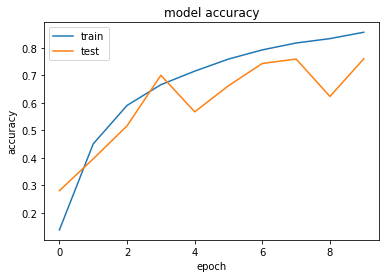

In [9]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()